## 자동차 리콜 3개년 분석

## 데이터 출처
-  https://www.data.go.kr/data/3048950/fileData.do

[받은 파일]
- 2020년:자동차리콜현황(2020) v3.0.csv
- 2021년:자동차리콜현황(2021).csv
- 2022년:한국교통안전공단_자동차결함 리콜현황_20221231.csv

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#데이터 로드
df_2020 = pd.read_csv('./data/자동차리콜현황(2020) v3.0.csv', encoding='euc_kr')
df_2021 = pd.read_csv('./data/자동차리콜현황(2021).csv', encoding='euc_kr')
df_2022 = pd.read_csv('./data/한국교통안전공단_자동차결함 리콜현황_20221231.csv', encoding='euc_kr')

In [4]:
df_2020.info()
df_2021.info()
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       1275 non-null   object
 1   차명        1275 non-null   object
 2   생산기간(부터)  1275 non-null   object
 3   생산기간(까지)  1275 non-null   object
 4   리콜개시일     1275 non-null   object
 5   리콜사유      1275 non-null   object
dtypes: object(6)
memory usage: 59.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       1962 non-null   object
 1   차명        1962 non-null   object
 2   생산기간(부터)  1962 non-null   object
 3   생산기간(까지)  1962 non-null   object
 4   리콜개시일     1962 non-null   object
 5   리콜사유      1962 non-null   object
dtypes: object(6)
memory usage: 92.1+ KB


In [5]:
df_2020.head()
df_2021.head()
df_2022.head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."


In [6]:
# 데이터 병합
df = pd.concat([df_2020,df_2021,df_2022])
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 4656 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       4656 non-null   object
 1   차명        4656 non-null   object
 2   생산기간(부터)  4656 non-null   object
 3   생산기간(까지)  4656 non-null   object
 4   리콜개시일     4656 non-null   object
 5   리콜사유      4656 non-null   object
dtypes: object(6)
memory usage: 254.6+ KB


,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."


In [10]:
# 데이터 중복 여부 및 개수 확인
df[df.duplicated(keep=False)]

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
34,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
82,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
1116,만트럭버스코리아(주),TGS,2016-10-17,2016-10-17,2021-09-01,"EGR 플랩의 내구성 부족으로 인한 EGR 플랩 파손(냉각수 누수, 플랩 파편의 연..."
1120,만트럭버스코리아(주),TGS,2016-10-17,2016-10-17,2021-09-01,"EGR 플랩의 내구성 부족으로 인한 EGR 플랩 파손(냉각수 누수, 플랩 파편의 연..."
1521,비엠더블유코리아(주),BMW 320d,2016-06-20,2020-07-31,2021-11-01,BMW 자체 품질조사 결과 2011년 3월 31일부터 2020년 8월 28일까지 생...
...,...,...,...,...,...,...
790,비엠더블유코리아(주),530d,2016-10-27,2018-09-05,2022-07-06,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
1144,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1145,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1216,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."


In [11]:
# 데이터 중복 처리(삭제)
df = df.drop_duplicates()

## 1. 제조사별 리콜 현황
* 3년동안 리콜 건수가 가장 많은 제조사는?
* 시각화를 통해 근거 자료 만들기

In [7]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt


plt.rc('font', family='Malgun Gothic') # 윈도우
plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 현상 해결

In [9]:
# 제조사별 리콜횟수 top 10
tmp = df.groupby('제작자').size().sort_values(ascending=False).to_frame('count').head(10)
tmp

,count
제작자,
비엠더블유코리아(주),1811
메르세데스벤츠코리아(주),1109
폭스바겐그룹코리아 주식회사,301
만트럭버스코리아(주),138
현대자동차(주),120
아우디폭스바겐코리아(주),115
한불모터스(주),102
(주)볼보자동차코리아,78
포드세일즈서비스코리아(유),76


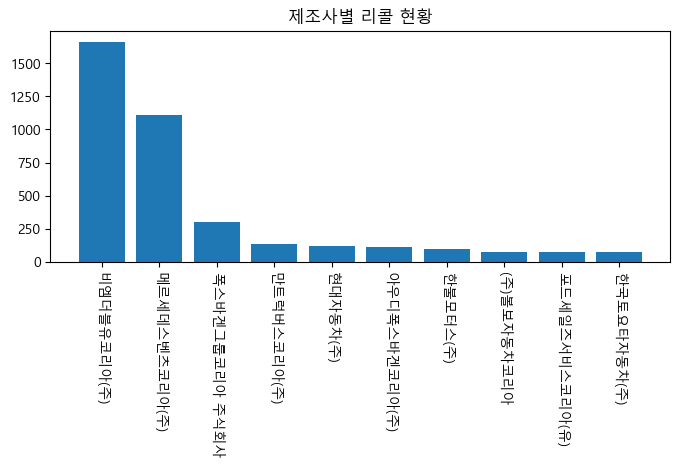

In [14]:
x = tmp.index
y = tmp['count']

plt.figure(figsize=(8,3))
plt.bar(x=x,height=y)
plt.xticks(rotation=270) # 회전
plt.title('제조사별 리콜 현황')
plt.show()

```
문제: 3년동안 리콜건수가 가장 많은 제조사는?
답: 비엠더블유코리아(주)

```

## 2.(그나마) 튼튼하게 만드는 기업 vs  Worst 기업 top10

* 출고 년도부터 리콜 개시일 사이의 기간을 사용기간이라고 할때, 
* 이 사용기간이 길면 길수록 그나마 튼튼하게 만들었다고 볼 수 있다. 
* 물론, 여기 리콜현황에 등록되지 않은 제조사가 베스트이겠지만....
* 사용기간의 평균이 가장 높고 낮은 10개 기업 리스트를 알아보자

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4498 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       4498 non-null   object
 1   차명        4498 non-null   object
 2   생산기간(부터)  4498 non-null   object
 3   생산기간(까지)  4498 non-null   object
 4   리콜개시일     4498 non-null   object
 5   리콜사유      4498 non-null   object
dtypes: object(6)
memory usage: 246.0+ KB


In [16]:
# 사용기간 컬럼 새로 만들기(파생변수 생성해서)

## 날짜형으로 변형
df['생산기간(부터)'] = pd.to_datetime(df['생산기간(부터)'])
df['생산기간(까지)'] = pd.to_datetime(df['생산기간(까지)'])
df['리콜개시일'] = pd.to_datetime(df['리콜개시일'])
# df.info()

## 파생변수 생성
df["사용기간"] = df["리콜개시일"] - df["생산기간(까지)"]

In [17]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4498 entries, 0 to 1418
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   제작자       4498 non-null   object         
 1   차명        4498 non-null   object         
 2   생산기간(부터)  4498 non-null   datetime64[ns] 
 3   생산기간(까지)  4498 non-null   datetime64[ns] 
 4   리콜개시일     4498 non-null   datetime64[ns] 
 5   리콜사유      4498 non-null   object         
 6   사용기간      4498 non-null   timedelta64[ns]
dtypes: datetime64[ns](3), object(3), timedelta64[ns](1)
memory usage: 281.1+ KB


In [18]:
# 제조사별 사용기간이 가장 긴 순서대로 정렬
df.groupby('제작자')['사용기간'].mean().sort_values(ascending=False).to_frame()


,사용기간
제작자,
한신특장,3349 days 00:00:00
한국닛산(주),2501 days 11:04:36.923076928
비엠더블유코리아(주),2023 days 07:46:41.927710848
아이씨피(주),1902 days 00:00:00
(주)다산중공업,1665 days 00:00:00
한국지엠주식회사,1626 days 04:48:00
(주)에프엠케이,1466 days 01:36:00
지엠아시아퍼시픽지역본부 주식회사,1247 days 00:00:00
진일엔지니어링 주식회사,1201 days 20:00:00


In [19]:
# 상위 10개
tmp_top = df.groupby('제작자')['사용기간'].mean().sort_values(ascending=False).to_frame('사용기간평균').head(10)
tmp_top

,사용기간평균
제작자,
한신특장,3349 days 00:00:00
한국닛산(주),2501 days 11:04:36.923076928
비엠더블유코리아(주),2023 days 07:46:41.927710848
아이씨피(주),1902 days 00:00:00
(주)다산중공업,1665 days 00:00:00
한국지엠주식회사,1626 days 04:48:00
(주)에프엠케이,1466 days 01:36:00
지엠아시아퍼시픽지역본부 주식회사,1247 days 00:00:00
진일엔지니어링 주식회사,1201 days 20:00:00


In [20]:
tmp_tail = df.groupby('제작자')['사용기간'].mean().sort_values(ascending=False).to_frame('사용기간평균').tail(10)
tmp_tail

,사용기간평균
제작자,
르노코리아자동차 주식회사,374 days 15:00:00
(주)스포츠모터사이클코리아,348 days 21:00:00
볼보트럭코리아(주),332 days 07:12:00
대전기계공업(주),328 days 04:30:00
(주) 바이크코리아,269 days 15:31:45.882352940
범한자동차 주식회사,261 days 18:00:00
(유)기흥모터스,254 days 22:51:25.714285716
명원아이앤씨(주),128 days 00:00:00
주식회사 케이에스티일렉트릭,113 days 00:00:00


Text(0.5, 1.0, '사용기간 가장 긴 제조사(good)')

<Figure size 800x400 with 0 Axes>

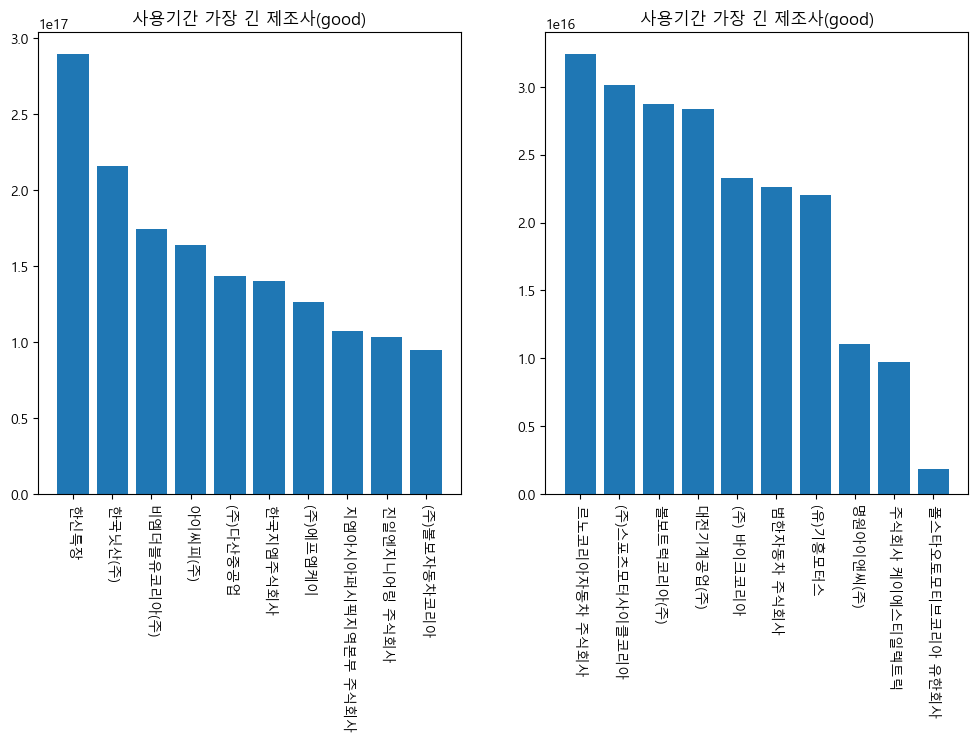

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

x1 = tmp_top.index
y1 = tmp_top['사용기간평균']

x2 = tmp_tail.index
y2 = tmp_tail['사용기간평균']

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1) 
plt.bar(x1, y1)
plt.xticks(rotation=270)
plt.title('사용기간 가장 긴 제조사(good)')


plt.subplot(1, 2, 2) 
plt.bar(x2, y2)
plt.xticks(rotation=270)
plt.title('사용기간 가장 긴 제조사(good)')

```
문제:그나마 튼튼 제조사 top 3는?
답: 한국닛산(주), 한신특장, 쌍용자동차(주)
```

## 3. 리콜이 가장 많은 제조사 1위의 리콜 원인은 ?
* 리콜 대마왕 XXX 기업의 문제의 모델 xxx에 대해 대규모 손해배상청구 소송을 진행하려 한다. 
* 이 회사의 주요 리콜 사유를 알아내고,(워드 클라우드로 제작해서 키워드 추출)
* 해당 사유로 리콜된 최고 문제 모델을 찾아내서
* 소송으로 가즈아~

In [23]:
# 리콜건수가 가장 많은 제조사는?
tmp = df.groupby('제작자').size().sort_values(ascending=False).to_frame('count')
tmp.index[0]

'비엠더블유코리아(주)'

In [30]:
# 리콜 사유는?
cond = df['제작자'] == tmp.index[0]
result = df[cond]
result['리콜사유']

11      2019년 01월 30일부터 2019년 10월 21일까지 생산된 BMW M5, M8...
12      2019년 01월 30일부터 2019년 10월 21일까지 생산된 BMW M5, M8...
34      차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
35      차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
36      차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
                              ...                        
1411    배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1412    배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1413    배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1414    배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415    배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
Name: 리콜사유, Length: 1660, dtype: object

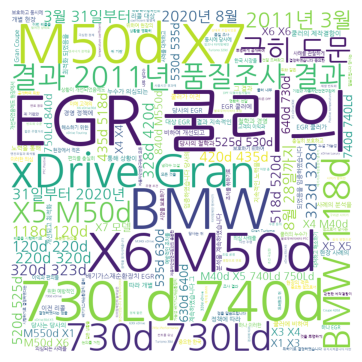

In [31]:
# 워드클라우드를 사용해 키워드 추출

from wordcloud import WordCloud, STOPWORDS
set(STOPWORDS)
spwords = set(['일부', '차량에서', '생산된', '자체', '되었습니다','발견','되었습니다.',"수이기는","적은 수이기는","동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당", "있어", "내에",
                "못", '으로", "의한', "위해", '후', '할', '로', '더', '와', '나', '전', '매우', '등', '내에', '을', '함'])

caselist = result['리콜사유'].values
text = ' '.join(caselist)
len(text)


font_path = './NanumGothic.ttf'
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path=font_path,
                background_color='white', width=800, height=800)
wc1.generate(text)

plt.figure(figsize=(6, 4))
plt.imshow(wc1)
plt.tight_layout()
plt.axis('off')
plt.show()


In [27]:
# 주요 원인이 포함된 이유 상세 보기 > ERG 쿨러의 

result['리콜사유'].unique() 
#현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되는 사례가 발견되었습니다'



,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,사용기간
1380,비엠더블유코리아(주),BMW X4 xDrive20d M Sport Package,2019-03-14,2021-07-28,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,512 days
1381,비엠더블유코리아(주),BMW X4 xDrive20d,2021-08-03,2022-03-25,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,272 days
1382,비엠더블유코리아(주),BMW X3 xDrive20d M Sport Package,2019-03-11,2021-07-24,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,516 days
1383,비엠더블유코리아(주),BMW X3 xDrive20d,2021-07-28,2022-03-28,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,269 days
1384,비엠더블유코리아(주),BMW 620d xDrive Luxury,2018-06-11,2020-06-29,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,906 days
1385,비엠더블유코리아(주),BMW 620d xDrive,2020-06-15,2022-02-02,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,323 days
1386,비엠더블유코리아(주),BMW 620d Luxury,2018-06-11,2020-06-30,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,905 days
1387,비엠더블유코리아(주),BMW 620d,2020-06-29,2022-01-26,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,330 days
1388,비엠더블유코리아(주),BMW 523d xDrive,2020-06-18,2022-01-24,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,332 days
1389,비엠더블유코리아(주),BMW 523d,2020-06-15,2022-01-25,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,331 days


In [35]:
#주요 원인으로 리콜된 가장 나쁜 모델3개는?
cond = result['리콜사유'] =='현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되는 사례가 발견되었습니다'
result_bad = result[cond].sort_values('사용기간').head(3)
result_bad

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,사용기간
1383,비엠더블유코리아(주),BMW X3 xDrive20d,2021-07-28,2022-03-28,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,269 days
1381,비엠더블유코리아(주),BMW X4 xDrive20d,2021-08-03,2022-03-25,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,272 days
1385,비엠더블유코리아(주),BMW 620d xDrive,2020-06-15,2022-02-02,2022-12-22,현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되...,323 days


In [36]:
result_bad["차명"]

1383    BMW X3 xDrive20d
1381    BMW X4 xDrive20d
1385     BMW 620d xDrive
Name: 차명, dtype: object

```
리콜 주요 원인은? 

그래서, 가장 나쁜 모델은?
BMW X3 xDrive20d 
BMW X3 xDrive20d
BMW X3 xDrive20d
```